<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl 
import seaborn as sns

Загрузить датасет по url:


In [169]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [135]:
df.head()
#len(df)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [170]:
#Какое это распределение? Равномерное распределение, т.к. каждого значения одинаковое количество наблюдений.
freedom=df['Freedom']
positive_affect=df['Positive affect']


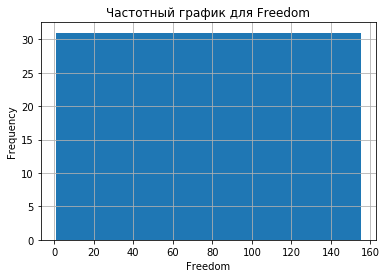

In [164]:
plt.hist(freedom,5)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.title('Частотный график для Freedom')
plt.grid(True)
plt.show()

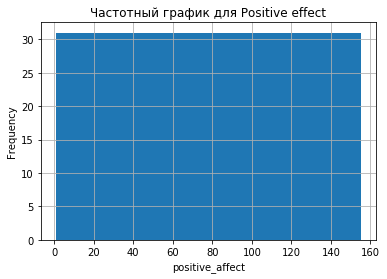

In [163]:
plt.hist(positive_affect,5)
plt.xlabel('positive_affect')
plt.ylabel('Frequency')
plt.title('Частотный график для Positive effect')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [32]:
#Считаем медиану
statistics.median(freedom)

71.0

In [173]:
#Считаем моду
statistics.mode(freedom)

StatisticsError: no unique mode; found 156 equally common values

Почему нельзя найти моду?

Определение: Мода - значение, которое встречается в выборке наибольшее количество раз
Ошибка говорит, что всего 156 значений и все они встречаются одинаковое количество раз.
Т.к. ни одно из них не встречается чаще  других, то моду найти нельзя.


In [43]:
#Считаем минимум и максимум
print(min(freedom),'; ',max(freedom))

1.0 ;  155.0


In [75]:
#Находим выбросы - NA
freedom.isna().sum()

1

In [77]:
#Проверяем есмть ли нули. Их нет.
df.loc[df['Freedom']==0,:]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy


In [201]:
df_new = df[~df['Freedom'].isnull()]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           155 non-null object
Ladder                     155 non-null int64
SD of Ladder               155 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      151 non-null float64
Healthy life
expectancy    149 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ KB


In [243]:
#Пересчитываем параметр freedom, т.к. он на 1 единицу уменьшился
freedom_new=df_new['Freedom']


In [203]:
len(freedom_new)

155

In [244]:
len(country)

155

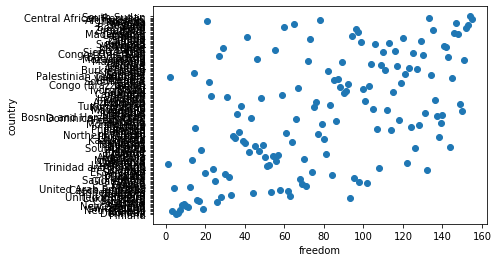

In [256]:
#Находим выбросы графически 
country=df_new['Country (region)']
plt.scatter(freedom_new, country)
plt.xlabel('freedom')
plt.ylabel('country')
plt.show()



In [208]:
#Посмотрим максимальные значения. Есть подозрения, что это не выбросы. Т.е. выбросов (кроме строки
#со зачением NAN) нет.
df_new.loc[df_new['Freedom']>150,:]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
121,Mauritania,122,68,94.0,58.0,99.0,151.0,67.0,148.0,117.0,120.0
146,Haiti,147,111,142.0,119.0,146.0,152.0,48.0,20.0,138.0,125.0
148,Syria,149,137,155.0,155.0,154.0,153.0,38.0,69.0,NaN,128.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
155,South Sudan,156,140,127.0,152.0,148.0,154.0,61.0,85.0,140.0,143.0


In [210]:
#Размах для колонки Freedom
razmah=max(freedom_new)-min(freedom_new)
razmah

154.0

In [222]:
#Считаем медиану
statistics.median(df_new['Freedom'])

78.0

In [211]:
 #дисперсия
statistics.pvariance(freedom_new)

2002.0

In [212]:
df_new.Freedom.dtype

dtype('float64')

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

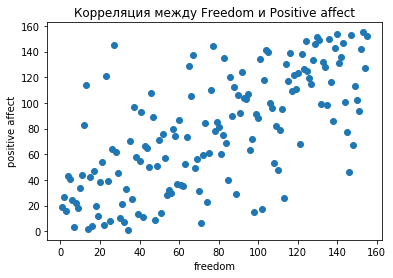

In [214]:
#Корреляция есть, прямая
freedom=df_new['Freedom']
positive_affect=df_new['Positive affect']

plt.xlabel('freedom')
plt.ylabel('positive affect')
plt.scatter(freedom_new, positive_affect)
plt.title('Корреляция между Freedom и Positive affect')
plt.show()

Коэффициент корреляции Пирсона: 0.6817698430601657


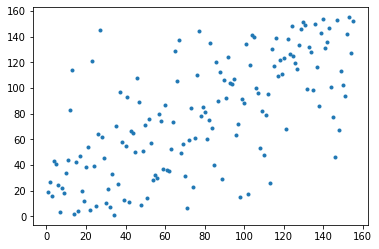

In [247]:
#корреляция прямая умеренная
from scipy.stats import pearsonr

corr, p_value = pearsonr(freedom, positive_affect)
plt.scatter(freedom, positive_affect, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [223]:
statistics.mean(df_new['Freedom'])

78.0

In [224]:
freedom=df_new['Freedom']
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [225]:
min(freedom_1)

-77.0

In [226]:
max(freedom_1)

77.0

In [227]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


(array([16., 15., 16., 15., 15., 16., 15., 16., 15., 16.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

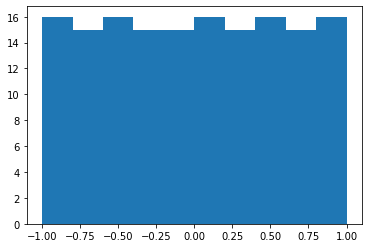

In [228]:
plt.hist(freedom_2)

Построить матрицу корреляций для всех колонок таблицы

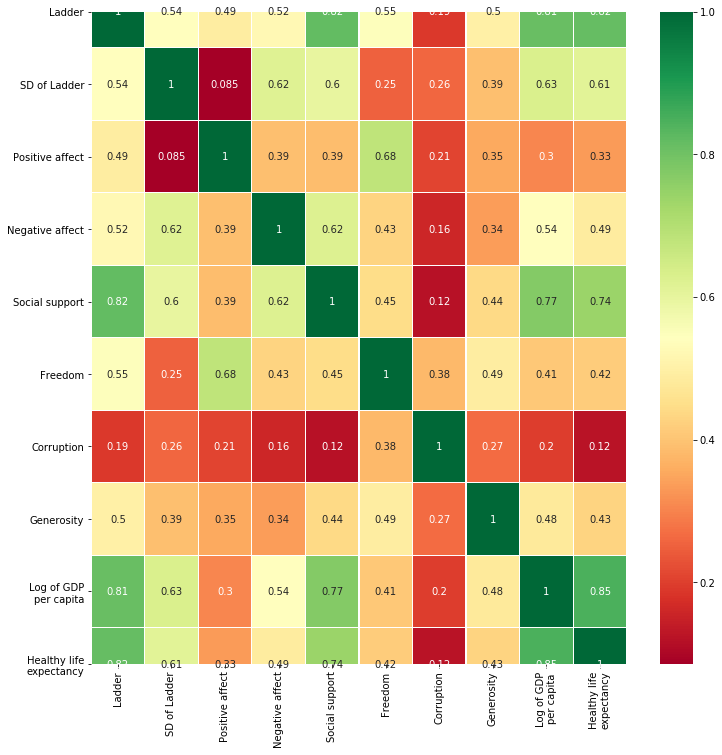

In [229]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


Загрузить таблицу цен на авокадо: 

In [234]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_av=pd.read_csv(url)
df_av[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

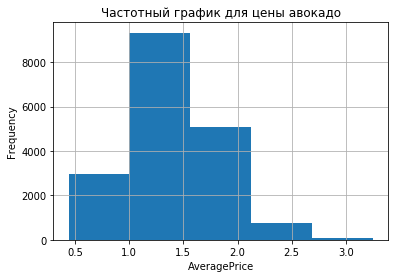

In [235]:
#Распределение нормальное
av_price=df_av['AveragePrice']

plt.hist(av_price,5)
plt.xlabel('AveragePrice')
plt.ylabel('Frequency')
plt.title('Частотный график для цены авокадо')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [236]:
from scipy.stats import pearsonr

In [237]:
col_Average_Price = df_av['AveragePrice']
col_4046 = df_av['4046']

-0.20831704848788474

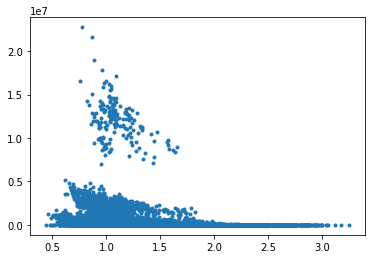

In [239]:
corr, p_value = pearsonr(col_Average_Price, col_4046)
plt.scatter(col_Average_Price, col_4046, marker='.')
corr

-0.1729277725093354

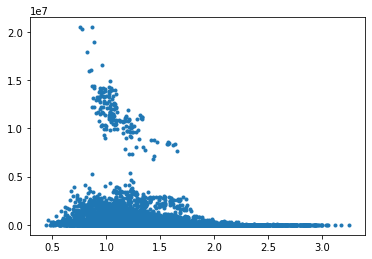

In [240]:
col_4225 = df_av['4225']

corr, p_value = pearsonr(col_Average_Price, col_4225)
plt.scatter(col_Average_Price, col_4225, marker='.')
corr

-0.1794459839797562

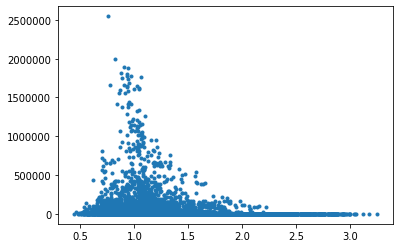

In [242]:
col_4770 = df_av['4770']

corr, p_value = pearsonr(col_Average_Price, col_4770)
plt.scatter(col_Average_Price, col_4770, marker='.')
corr

Корреляция везде обратная, но далека от -1. Т.е. корреляция слабая обратная.